![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_class_text_classification/NLU_training_multi_class_text_classifier_demo_amazon.ipynb)



# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
## 3 class Amazon Phone review classifier training]
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)




You can achieve these results or even better on this dataset with training data:



<br>

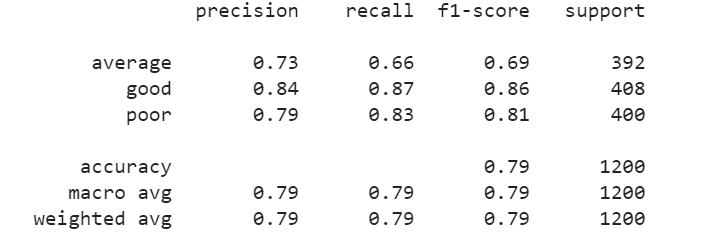




You can achieve these results or even better on this dataset with test data:


<br>


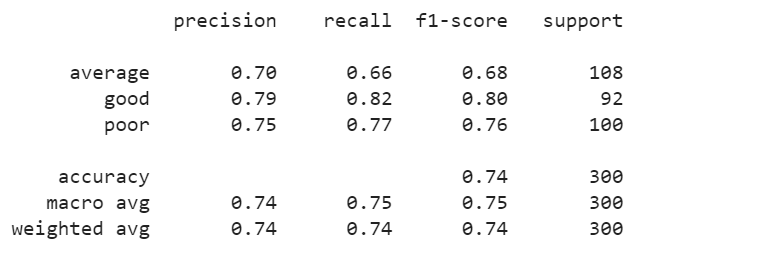

# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install  pyspark==2.4.7 
! pip install nlu > /dev/null    



import nlu

     |████████████████████████████████| 217.9MB 67kB/s 
     |████████████████████████████████| 204kB 17.7MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279465 sha256=90dbb9e58f0f2c2d84f268ee8dd9f2f6334927c1a225a2bb63a9208d3133b1ae
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark


# 2. Download Amazon Unlocked mobile phones dataset 
https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

dataset with unlocked mobile phone reviews in 5 review classes


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/01/Amazon_Unlocked_Mobile.csv

--2021-03-01 02:01:56--  http://ckl-it.de/wp-content/uploads/2021/01/Amazon_Unlocked_Mobile.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 452621 (442K) [text/csv]
Saving to: ‘Amazon_Unlocked_Mobile.csv’

Amazon_Unlocked_Mob 100%[===================>] 442.01K   817KB/s    in 0.5s    

2021-03-01 02:01:57 (817 KB/s) - ‘Amazon_Unlocked_Mobile.csv’ saved [452621/452621]



In [ ]:
import pandas as pd
test_path = '/content/Amazon_Unlocked_Mobile.csv'
train_df = pd.read_csv(test_path,sep=",")
cols = ["y","text"]
train_df = train_df[cols]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df



,y,text
1040,good,Nice phone. Easy to read screen. I am a senior...
157,good,Just as promised. This a great SmartPhone. Ver...
331,average,It'sn a powerfull phone.
842,good,1- the manual don`t have english.just it. I li...
766,average,the iphone is good! but i have an issue the he...
...,...,...
1307,good,"this phone met all our expectations, my dad lo..."
1396,average,"By mistake, I bought a wrong iPhone. It can no..."
538,average,A nice inexpensive phone (in its day) bought u...
1460,good,Excellent phone!


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# Since there are no

trainable_pipe = nlu.load('train.classifier')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50] )


# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50] )
preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,text,category_confidence,y,sentence,category,default_name_embeddings
origin_index,,,,,,
1040,Nice phone. Easy to read screen. I am a senior...,0.898174,good,Nice phone.,good,"[0.013208696618676186, -0.07603943347930908, -..."
1040,Nice phone. Easy to read screen. I am a senior...,0.898174,good,Easy to read screen.,good,"[0.000669187749736011, -0.014507204294204712, ..."
1040,Nice phone. Easy to read screen. I am a senior...,0.898174,good,I am a senior and not a tech so the learning c...,good,"[-0.007202684413641691, 0.02755507454276085, -..."
1040,Nice phone. Easy to read screen. I am a senior...,0.898174,good,"The support at Jethro, however, made it easy.",good,"[0.05683695524930954, 0.025926098227500916, -0..."
1040,Nice phone. Easy to read screen. I am a senior...,0.898174,good,"They were knowledgeable, easy to understand, p...",good,"[-8.556042303098366e-05, 0.017817411571741104,..."
...,...,...,...,...,...,...
402,I bought it for my mom who is in her late 70s ...,0.916765,good,"I wish it had an alarm.When it comes to ""senio...",good,"[0.06437729299068451, -0.06652847677469254, -0..."
402,I bought it for my mom who is in her late 70s ...,0.916765,good,This one is half the price of the old one and ...,good,"[0.0695129781961441, 0.001408637617714703, -0...."
402,I bought it for my mom who is in her late 70s ...,0.916765,good,"Since most seniors are hard of hearing, they r...",good,"[0.019210360944271088, 0.07541776448488235, -0..."


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("It worked perfectly .")

,category_confidence,sentence,category,default_name_embeddings
origin_index,,,,
0,0.939155,It worked perfectly .,good,"[0.016563203185796738, 0.002423828700557351, -..."


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['classifier_dl'] has settable params:
pipe['classifier_dl'].setMaxEpochs(3)                | Info: Maximum number of epochs to train | Currently set to : 3
pipe['classifier_dl'].setLr(0.005)                   | Info: Learning Rate | Currently set to : 0.005
pipe['classifier_dl'].setBatchSize(64)               | Info: Batch size | Currently set to : 64
pipe['classifier_dl'].setDropout(0.5)                | Info: Dropout coefficient | Currently set to : 0.5
pipe['classifier_dl'].setEnableOutputLogs(True)      | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
>>> pipe['default_tokenizer'] has settable params:
pipe['default_tokenizer'].setTargetPattern('\S+')    | Info: pattern to grab from text as token candidates. Defaults \S+ | Currently set to : \S+
pipe['default_tokenizer'].setContextChars(['.', ',', ';', ':', '!', '?', '*', '-', '(', ')', '"', 

## 6.  Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['classifier_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:100])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))
preds

              precision    recall  f1-score   support

     average       0.43      0.90      0.58        29
        good       0.80      0.84      0.82        38
        poor       0.00      0.00      0.00        33

    accuracy                           0.58       100
   macro avg       0.41      0.58      0.47       100
weighted avg       0.43      0.58      0.48       100



,text,category_confidence,y,category,default_name_embeddings,document
origin_index,,,,,,
1040,Nice phone. Easy to read screen. I am a senior...,0.986631,good,good,"[0.04795455560088158, 0.04623281955718994, 0.0...",Nice phone. Easy to read screen. I am a senior...
157,Just as promised. This a great SmartPhone. Ver...,0.944038,good,good,"[0.07041990756988525, -0.04600438475608826, -0...",Just as promised. This a great SmartPhone. Ver...
331,It'sn a powerfull phone.,0.941313,average,good,"[0.06664986908435822, -0.010421414859592915, -...",It'sn a powerfull phone.
842,1- the manual don`t have english.just it. I li...,0.989852,good,good,"[0.035181764513254166, -0.06844104826450348, 0...",1- the manual don`t have english.just it. I li...
766,the iphone is good! but i have an issue the he...,0.956226,average,average,"[0.05243289843201637, -0.0002974773815367371, ...",the iphone is good! but i have an issue the he...
...,...,...,...,...,...,...
165,It's Ok.,0.851562,good,good,"[0.010556062683463097, -0.0037851801607757807,...",It's Ok.
1181,"you can download music, applications, comes un...",0.976442,good,good,"[0.05078510940074921, -0.022081272676587105, -...","you can download music, applications, comes un..."
531,"Personally, I would NEVER purchase any Apple h...",0.911216,average,average,"[0.06057704612612724, 0.0446881465613842, -0.0...","Personally, I would NEVER purchase any Apple h..."


#7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
from sklearn.metrics import classification_report
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.classifier')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['classifier_dl'].setMaxEpochs(90)  
trainable_pipe['classifier_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))

#preds


sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

     average       0.73      0.66      0.69       392
        good       0.84      0.87      0.86       408
        poor       0.79      0.83      0.81       400

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))

              precision    recall  f1-score   support

     average       0.70      0.66      0.68       108
        good       0.79      0.82      0.80        92
        poor       0.75      0.77      0.76       100

    accuracy                           0.74       300
   macro avg       0.74      0.75      0.75       300
weighted avg       0.74      0.74      0.74       300



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('It worked perfectly.')
preds

,classifier_confidence,document,en_embed_sentence_small_bert_L12_768_embeddings,classifier
origin_index,,,,
0,0.950214,It worked perfectly.,"[0.275971919298172, 0.4924655854701996, 0.2755...",good


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')             | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector'] has settable params:
pipe['sentence_detector'].setCustomBounds([])                   | Info: characters used to explicitly mark sentence bounds | Currently set to : []
pipe['sentence_detector'].setDetectLists(True)                  | Info: whether detect lists during sentence detection | Currently set to : True
pipe['sentence_detector'].setExplodeSentences(False)            | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector'].setMaxLength(99999)                   | Info: Set the maximum allowed length f